# Text preprocessing and linguistic annotations

### Data loading and explorative analysis
We will be loading a corpus of Amazon reviews for the products in the category "Electronics"

In [1]:
# codecs library helps with reading from (or writing to) files with different encodings (e.g., UTF-8, ANSII, etc.)
import codecs

# specifying the location of the file containing our reviews
filepath = "unlabeled_reviews.txt"

# loading the content of the file and creating a list of texts from its lines (one review per line)
dataset = [l.strip() for l in list(codecs.open(filepath, "r", encoding = 'utf8', errors = 'replace').readlines())]

# let's see how many reviews we have in our dataset
print("We have: " + str(len(dataset)) + " reviews in the dataset.")
print()
      
# let's take a look at some concrete review
rev_index = 0
print(dataset[rev_index])


We have: 13153 reviews in the dataset.

First of all why do you want a power UPS? There are some very good reasons. (1) You never want your machine to go down incorrectly because of a blackout. (2) You want to work with clean power only. (3) You want to monitor your PC power. (4) You want to prevent your PC from being damaged due to a power problem like a lighting strike and want surge protection. The first rule about UPS is to never trust the insurance claim. Get your PC insured elsewhere. These companies have a tendency not to support their insurance claims. I have a PC running some very high specifications with over six USB devices, LCD monitor, printer and Ethernet equipment, with everything on at the same time. I have never gone above 325W of usage and average between 250W and 300W when managing a high spec game and doing lots of background tasks. Even though I have a 400W Power Supply Unit (PSU) I will be upgrading to a 500W PSU because it is better quality model. The way I can m

In [ ]:
# pip install wordcloud

In [ ]:
# pip install matplotlib

Let's do a bit of explorative analysis of our dataset. Which electronic devices are most represented in the dataset? 

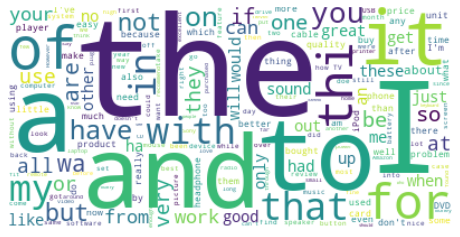

In [2]:
# wordcloud is a Python library for generating word clouds from text
import wordcloud
from wordcloud import WordCloud

# matplotlib is a Python library for plotting / rendering data and graphs of all kinds
import matplotlib.pyplot as plt

# concatenating all our reviews into one long text
big_text = " ".join(dataset)

# creating an object of WordCloud which we will then depict: defining white background and feeding our big text
wcloud = WordCloud(collocations = False, background_color = "white", stopwords = []).generate_from_text(big_text)

# setting the size of the figure for wordclous plot
plt.figure(figsize=(8,7))

# plotting the created wordcloud
plt.imshow(wcloud, interpolation = "bilinear")
# we don't want to plot the axis
plt.axis("off")
# showing the plot
plt.show()


In [3]:
# import the list of English STOPWORDS from the wordcloud library
from wordcloud import STOPWORDS

# removing the repetitions if there are any, converting the list to set
stopwords = set(STOPWORDS)

# printing the list of stopwords
print(stopwords)

{'we', 'during', 'is', 'there', 'did', "they've", 'an', 'having', "mustn't", 'in', "i'd", "we'd", "when's", "we're", "i'm", 'myself', 'the', 'who', "you'll", "aren't", "they'll", 'and', 'where', 'their', 'also', 'few', "isn't", 'ourselves', 'other', "he'd", "here's", 'them', 'does', 'yourselves', "they're", 'further', 'down', 'whom', 'until', "i'll", 'otherwise', 'through', "what's", 'out', 'no', 'as', 'had', 'these', 'it', "haven't", "i've", 'while', 'else', 'herself', "wasn't", "couldn't", "we've", 'since', 'com', 'can', "can't", 'itself', 'with', "he'll", "hadn't", 'do', 'himself', 'have', 'between', 'such', 'me', 'r', "we'll", 'his', "weren't", "let's", 'off', 'has', 'once', 'then', 'on', "they'd", 'most', 'yourself', 'would', 'against', 'ever', "hasn't", 'this', 'like', 'some', 'under', 'should', 'each', "how's", "shouldn't", 'too', "why's", "won't", 'at', 'own', 'were', 'when', 'i', 'than', 'about', 'from', 'they', 'you', 'a', "doesn't", "he's", 'my', 'any', 'how', 'shall', "ther

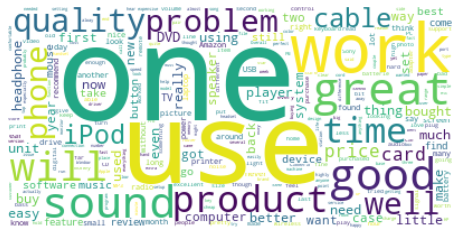

In [4]:
# setting the size of the figure for wordcloud plot
plt.figure(figsize=(8,7))

# creating an object of WordCloud which we will then depict: defining white background and feeding our big text
wcloud = WordCloud(max_words = 500, collocations = False, background_color = "white", stopwords = stopwords).generate_from_text(big_text)

# plotting the created wordcloud
plt.imshow(wcloud, interpolation = "bilinear")

# we don't want to plot the axis
plt.axis("off")

# showing the plot
plt.show()

In [ ]:
# pip install spacy

In [ ]:
# pip install -U spacy

In [ ]:
#conda install -c conda-forge spacy

### Text Preprocessing (tokenization, lemmatization / stemming stopword removal)
let's break down the texts into tokens, normalize the texts (lemmatize or stem) and remove stopwords

In [ ]:
# conda update -n base -c defaults conda


In [5]:
import spacy 

spacy.cli.download("en_core_web_sm")

nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
## python -m spacy download en_core_web_sm

In [6]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [7]:
####### Tokenization

# we will use the SpaCy library for preprocessing and linguistic annotations
import spacy

# the default nlp pipeline will perform tokenization, POS-tagging, dependency parsing, and named entity recognition
nlp = spacy.load("en_core_web_sm")


tokenized_dataset = []
# if we just want tokenization, additional steps may slow the process, so we can use the "pipe" mode of SpaCy instead
# to eliminate POS-tagging, parsing, and NER
for doc in nlp.pipe(dataset, disable=["tagger", "parser", "ner"]):
    # t.text will give us the original text for each token in the text/document
    tokenized_dataset.append([t.text for t in doc])
    
print(tokenized_dataset[rev_index])


['First', 'of', 'all', 'why', 'do', 'you', 'want', 'a', 'power', 'UPS', '?', 'There', 'are', 'some', 'very', 'good', 'reasons', '.', '(', '1', ')', 'You', 'never', 'want', 'your', 'machine', 'to', 'go', 'down', 'incorrectly', 'because', 'of', 'a', 'blackout', '.', '(', '2', ')', 'You', 'want', 'to', 'work', 'with', 'clean', 'power', 'only', '.', '(', '3', ')', 'You', 'want', 'to', 'monitor', 'your', 'PC', 'power', '.', '(', '4', ')', 'You', 'want', 'to', 'prevent', 'your', 'PC', 'from', 'being', 'damaged', 'due', 'to', 'a', 'power', 'problem', 'like', 'a', 'lighting', 'strike', 'and', 'want', 'surge', 'protection', '.', 'The', 'first', 'rule', 'about', 'UPS', 'is', 'to', 'never', 'trust', 'the', 'insurance', 'claim', '.', 'Get', 'your', 'PC', 'insured', 'elsewhere', '.', 'These', 'companies', 'have', 'a', 'tendency', 'not', 'to', 'support', 'their', 'insurance', 'claims', '.', 'I', 'have', 'a', 'PC', 'running', 'some', 'very', 'high', 'specifications', 'with', 'over', 'six', 'USB', 'de

In [8]:
###### Lemmatization

lemmatized_dataset = []
for doc in nlp.pipe(dataset, disable=["tagger", "parser", "ner"]):
    
    # t.lemma_ will give us the lemma for each token in the text/document
    lemmatized_dataset.append([t.lemma_ for t in doc])

print()
print(lemmatized_dataset[rev_index])


['First', 'of', 'all', 'why', 'do', 'you', 'want', 'a', 'power', 'UPS', '?', 'There', 'be', 'some', 'very', 'good', 'reason', '.', '(', '1', ')', 'You', 'never', 'want', 'your', 'machine', 'to', 'go', 'down', 'incorrectly', 'because', 'of', 'a', 'blackout', '.', '(', '2', ')', 'You', 'want', 'to', 'work', 'with', 'clean', 'power', 'only', '.', '(', '3', ')', 'You', 'want', 'to', 'monitor', 'your', 'PC', 'power', '.', '(', '4', ')', 'You', 'want', 'to', 'prevent', 'your', 'PC', 'from', 'be', 'damage', 'due', 'to', 'a', 'power', 'problem', 'like', 'a', 'light', 'strike', 'and', 'want', 'surge', 'protection', '.', 'The', '\ufeff1', 'rule', 'about', 'UPS', 'be', 'to', 'never', 'trust', 'the', 'insurance', 'claim', '.', 'Get', 'your', 'PC', 'insure', 'elsewhere', '.', 'These', 'company', 'have', 'a', 'tendency', 'not', 'to', 'support', 'their', 'insurance', 'claim', '.', 'I', 'have', 'a', 'PC', 'run', 'some', 'very', 'high', 'specification', 'with', 'over', 'six', 'USB', 'device', ',', 'LC

In [9]:
####### Stemming 

# we will use the Porter stemmer from the NLTK library
import nltk
from nltk.stem.porter import *

# instantiate the stemmer object
stemmer = PorterStemmer()

stemmed_dataset = []
for doc in nlp.pipe(dataset, disable=["tagger", "parser", "ner"]):
    
    # t.text will give us the raw token text which we then stem with the stemmer
    stemmed_dataset.append([stemmer.stem(t.text) for t in doc])

print()
print(stemmed_dataset[rev_index])




['first', 'of', 'all', 'whi', 'do', 'you', 'want', 'a', 'power', 'up', '?', 'there', 'are', 'some', 'veri', 'good', 'reason', '.', '(', '1', ')', 'you', 'never', 'want', 'your', 'machin', 'to', 'go', 'down', 'incorrectli', 'becaus', 'of', 'a', 'blackout', '.', '(', '2', ')', 'you', 'want', 'to', 'work', 'with', 'clean', 'power', 'onli', '.', '(', '3', ')', 'you', 'want', 'to', 'monitor', 'your', 'PC', 'power', '.', '(', '4', ')', 'you', 'want', 'to', 'prevent', 'your', 'PC', 'from', 'be', 'damag', 'due', 'to', 'a', 'power', 'problem', 'like', 'a', 'light', 'strike', 'and', 'want', 'surg', 'protect', '.', 'the', 'first', 'rule', 'about', 'up', 'is', 'to', 'never', 'trust', 'the', 'insur', 'claim', '.', 'get', 'your', 'PC', 'insur', 'elsewher', '.', 'these', 'compani', 'have', 'a', 'tendenc', 'not', 'to', 'support', 'their', 'insur', 'claim', '.', 'I', 'have', 'a', 'PC', 'run', 'some', 'veri', 'high', 'specif', 'with', 'over', 'six', 'usb', 'devic', ',', 'lcd', 'monitor', ',', 'printer'

### Linguistic annotations: POS-tagging and dependency parsing
SpaCy has pre-trained models for POS-tagging and dependency parsing



In [14]:
# parsing and pos-tagging may take longer on large datasets, so let's only demonstrate the functionality on first N reviews in our collection
N = 2
small_dataset = dataset[:N]

for doc in nlp.pipe(small_dataset, disable=["ner"]):
    # POS-tagging and parses are performed on a sentence-level (not document level, like tokenization)
    for sent in doc.sents:
        print(sent.text)
        print("------------------------------------")
        for tok in sent:
            # tok.i index of the token in the document
            # sent.start index of the starting token of the sentence in the document
            # tok.tag_ is the fine-grained POS-tag; 
            # tok.pos_ is the coarse-grained POS-tag; 
            # tok.dep_ is the dependency relation from the governing token to this token
            # tok.head is the token which is the syntactic head of the current token (.text is it's text, .i its index in the document)
            print(tok.i - sent.start, tok.text, tok.tag_, tok.pos_, tok.dep_, tok.head.text, "(" + str(tok.head.i - sent.start) + ")")
        print()        
                
    
    

First of all why do you want a power UPS?
------------------------------------
0 First RB ADV advmod want (6)
1 of IN ADP prep First (0)
2 all DT DET pobj of (1)
3 why WRB ADV advmod want (6)
4 do VBP AUX aux want (6)
5 you PRP PRON nsubj want (6)
6 want VB VERB ROOT want (6)
7 a DT DET det UPS (9)
8 power NN NOUN compound UPS (9)
9 UPS NNP PROPN dobj want (6)
10 ? . PUNCT punct want (6)

There are some very good reasons.
------------------------------------
0 There EX PRON expl are (1)
1 are VBP AUX ROOT are (1)
2 some DT DET det reasons (5)
3 very RB ADV advmod good (4)
4 good JJ ADJ amod reasons (5)
5 reasons NNS NOUN attr are (1)
6 . . PUNCT punct are (1)

(1) You never want your machine to go down incorrectly because of a blackout.
------------------------------------
0 ( -LRB- PUNCT punct 1 (1)
1 1 LS X meta want (5)
2 ) -RRB- PUNCT punct 1 (1)
3 You PRP PRON nsubj want (5)
4 never RB ADV neg want (5)
5 want VBP VERB ROOT want (5)
6 your PRP$ DET poss machine (7)
7 machine NN NOU

19 it PRP PRON nsubj has (20)
20 has VBZ AUX advcl use (15)
21 one CD NUM nsubj turned (29)
22 of IN ADP prep one (21)
23 every DT DET det device (24)
24 device NN NOUN pobj of (22)
25 you PRP PRON nsubj think (27)
26 can MD VERB aux think (27)
27 think VB VERB relcl device (24)
28 off RP ADP prt think (27)
29 turned VBD VERB ccomp has (20)
30 on RP ADP prt turned (29)
31 . . PUNCT punct say (2)

As soon as we add things like another PC, or several printers, or several monitors, then we can start to overload a 325W UPS.
------------------------------------
0 As RB ADV advmod soon (1)
1 soon RB ADV advmod start (21)
2 as IN SCONJ mark add (4)
3 we PRP PRON nsubj add (4)
4 add VBP VERB advcl soon (1)
5 things NNS NOUN dobj add (4)
6 like IN SCONJ prep things (5)
7 another DT DET det PC (8)
8 PC NN NOUN pobj like (6)
9 , , PUNCT punct PC (8)
10 or CC CCONJ cc PC (8)
11 several JJ ADJ amod printers (12)
12 printers NNS NOUN conj PC (8)
13 , , PUNCT punct printers (12)
14 or CC CCONJ cc pri

22 for IN ADP prep designed (21)
23 computer NN NOUN compound use (24)
24 use NN NOUN pobj for (22)
25 rather RB ADV advmod than (26)
26 than IN SCONJ cc use (24)
27 a DT DET det UPS (28)
28 UPS NNP PROPN conj use (24)
29 for IN ADP prep UPS (28)
30 non JJ ADJ dep - (31)
31 - JJ ADJ dep computer (32)
32 computer JJ ADJ amod equipment (33)
33 equipment NN NOUN pobj for (29)
34 . . PUNCT punct looking (17)

Most UPS have LED indicators that tell you the status of the unit.
------------------------------------
0 Most JJS ADJ amod UPS (1)
1 UPS NNS NOUN nsubj have (2)
2 have VBP AUX ROOT have (2)
3 LED VBN VERB compound indicators (4)
4 indicators NNS NOUN dobj have (2)
5 that WDT DET nsubj tell (6)
6 tell VBP VERB relcl indicators (4)
7 you PRP PRON dative tell (6)
8 the DT DET det status (9)
9 status NN NOUN dobj tell (6)
10 of IN ADP prep status (9)
11 the DT DET det unit (12)
12 unit NN NOUN pobj of (10)
13 . . PUNCT punct have (2)

The next thing to understand is that testing your UPS

5 another DT DET det PC (6)
6 PC NN NOUN pobj to (4)
7 without IN ADP prep Networking (0)
8 UPS NNP PROPN pobj without (7)
9 can MD VERB aux increase (11)
10 also RB ADV advmod increase (11)
11 increase VB VERB ROOT increase (11)
12 the DT DET det risk (13)
13 risk NN NOUN dobj increase (11)
14 of IN ADP prep risk (13)
15 surge NN NOUN compound problems (17)
16 protection NN NOUN compound problems (17)
17 problems NNS NOUN pobj of (14)
18 . . PUNCT punct increase (11)

It is not recommend that you network a UPS PC to a non-UPS PC unless surge protection and the warranty are not an issue.
------------------------------------
0 It PRP PRON nsubjpass recommend (3)
1 is VBZ AUX auxpass recommend (3)
2 not RB PART neg recommend (3)
3 recommend VB VERB ROOT recommend (3)
4 that IN SCONJ mark network (6)
5 you PRP PRON nsubj network (6)
6 network VBP VERB ccomp recommend (3)
7 a DT DET det PC (9)
8 UPS NNP PROPN compound PC (9)
9 PC NN NOUN dobj network (6)
10 to IN ADP prep network (6)
11 a 

In [11]:
# displacy sublibrary part of SpaCy lets us visualize the dependency parse of a sentence
import spacy
from spacy import displacy

sentence = "These companies have a tendency not to support their insurance claims."
sent = nlp(sentence)
displacy.serve(sent, style = "dep")


C:\ProgramData\Anaconda3\lib\site-packages\spacy\displacy\__init__.py:94: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


### Simple use case

Your company produces "displays" and is interested in identifying the aspects of displays that users pay special attention to. You will try to identify those aspects with a simple heuristic: list adjectives and nouns that tend to appear in the neighbourhood of "display"

In other words, you want to search for patterns "[ADJ | NOUN] display" -- i.e., where a token with a (coarse) POS-tag "ADJ" or "NOUN" precedes the token with the lemma "display"  


In [16]:
nlp.add_pipe(nlp.create_pipe('sentencizer'))

In [17]:
# if we're not using dependency parsing (which in case we won't) we need to add an explicit sentence splitter to the Spacy pipeline
#nlp.add_pipe(nlp.create_pipe('sentencizer'))

# solution
aspects = []


for doc in nlp.pipe(dataset, disable=["parser", "ner"]):
    for sent in doc.sents:
        for tok in sent:
            # if the lemma of the token is "display"
            if tok.lemma_ == "display":
                # and it is not the first token in the sentence and the preceeding token has POS-tag "JJ" or "NN"
                if (tok.i - sent.start > 0) and doc[tok.i - 1].pos_ in ["ADJ", "NOUN"]:
                    print(sent.text)
                    print("-----------------")
                    asp = doc[tok.i - 1].text
                    print(asp)
                    print()
                    
                    aspects.append(asp)

unique_aspect_words = set(aspects)
print([uas + " display" for uas in unique_aspect_words])
    

in fact, forget anything with buttons or digital displays.
-----------------
digital

While it has superior sound quality and features than the competition, the rear light is very bright and the clock display is almost impossible to read from more than a few feet away.
-----------------
clock

I placed a piece of electrical tape over the rear light unit to dampen the brightness and have decided to keep my 15-year-old Sony Dream Machine alarm clock plugged in next to the new one so I can see the time display off the old one from my bed.
-----------------
time

LCD screen has huge growth potential for other info display.
-----------------
info

The digital display is very good and accurate.
-----------------
digital

It allows you to select what picture displays when you browse through the programs.
-----------------
picture

Other people have mentioned the too bright display and the "gradual volume increase", which I eventually got used to, but I could see how they would be incredibly a

Very good display, and very bright too.
-----------------
good

The Skype integration works well and the LCD display was useful and impressive.
-----------------
LCD

The Talking CID says what the phone line displays.
-----------------
line

1 - No backlit display on LCD 2- Only has 3 programmable speed dial numbers.
-----------------
backlit

4 - Would be nice if the LCD display tilted.
-----------------
LCD

Large display as compared to the 15 inch huge box of a unit I had previously.
-----------------
Large

The LCD display is clear and doesn't present too much information at one time.
-----------------
LCD

Detailed management functions, e.g.playlists) should be done via on-board player SW thru' device user interface) 5)Beautiful little screen, I will rarely if ever bother with movies on a 1.5 inch display, but the screen is very clear, crisp, and nice to use which is a big plus to me.
-----------------
inch

I'm now going for my second replacement since I purchased the original di

If you want 2.0 speakers small enough to sit on your desk around your computer display, these are definitely the best ones available.
-----------------
computer

Clear display, nice solid remote control, smooth DVD door.
-----------------
Clear

There's not even a clock display.
-----------------
clock

The "Now Playing" screen displays some titles center-aligned, some left-aligned.
-----------------
screen

In five years, improved flat screen display technologies will probably make you want to replace this unit and move it to a bedroom.
-----------------
screen

Including an equalizer, clock, special display features, and much more.
-----------------
special

Sounds great, great display, great features.
-----------------
great

Don't forget the EASY- TO- REACH electronic volume control buttons with screen scale display, and that's applies to all the hand set, the head set and the speaker.
-----------------
scale

Nice color display, good battery life, easy to use, easy to find places.